In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import yfinance as yf

start = '2010-01-01'
end = '2023-12-31'

df = yf.download('AAPL', start=start, end=end)
df.head()


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.454505,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.465665,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.362819,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.351056,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.393281,447610800


In [4]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-22,195.179993,195.410004,192.970001,193.600006,192.868134,37122800
2023-12-26,193.610001,193.889999,192.830002,193.050003,192.320221,28919300
2023-12-27,192.490005,193.500000,191.089996,193.149994,192.419830,48087700
2023-12-28,194.139999,194.660004,193.169998,193.580002,192.848221,34049900
2023-12-29,193.899994,194.399994,191.729996,192.529999,191.802170,42628800


In [5]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.454505,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.465665,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.362819,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.351056,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.393281,447610800


In [6]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


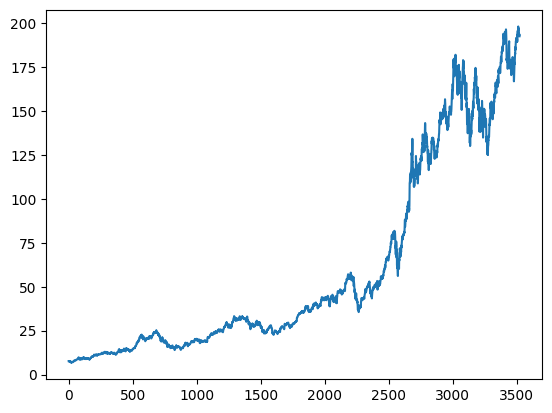

In [7]:
plt.plot(df.Close)

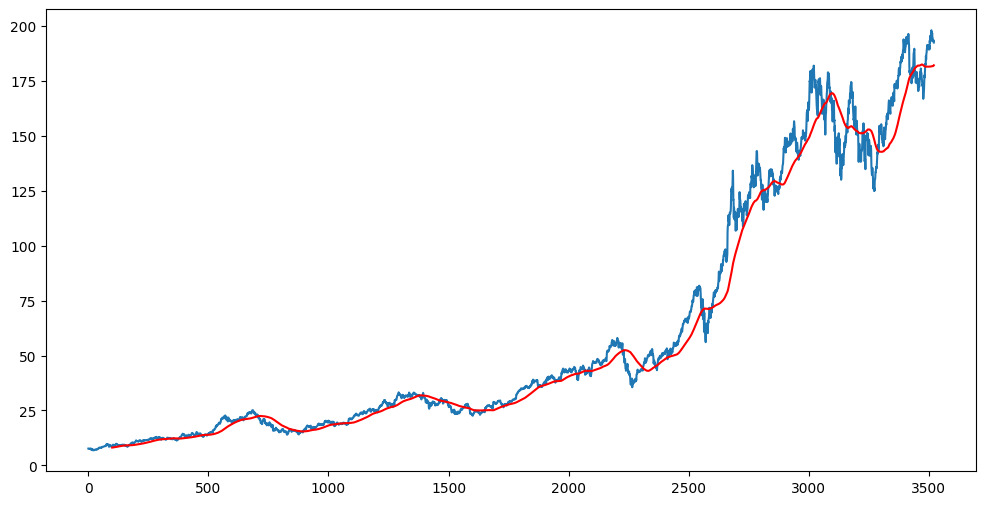

In [8]:
ma100 = df.Close.rolling(100).mean()
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

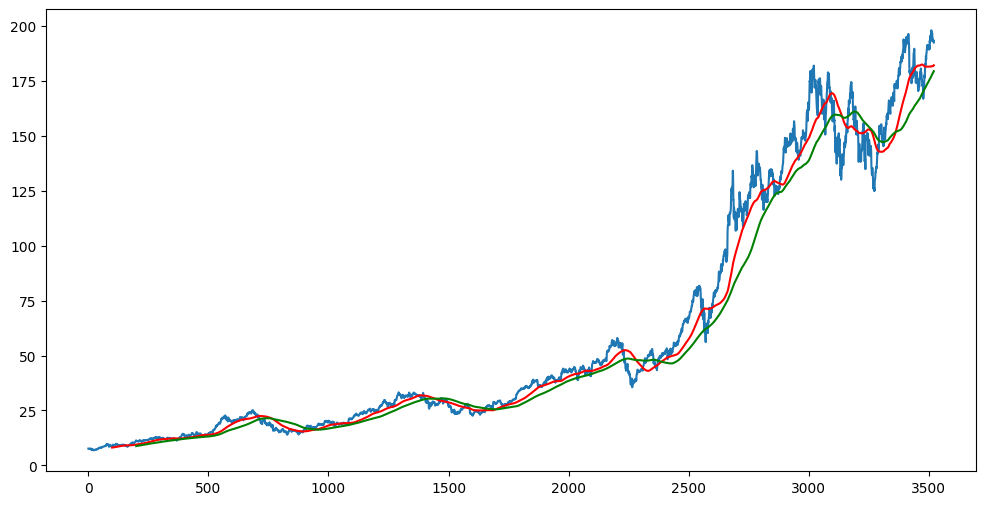

In [9]:
ma200 = df.Close.rolling(200).mean()
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [10]:
df.shape

(3522, 5)

In [11]:
# spliting data into training and testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_testing.shape)
print(data_training.shape)

(1057, 1)
(2465, 1)


In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [13]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.01502647],
       [0.01527965],
       [0.01294631],
       ...,
       [0.99573703],
       [0.9911866 ],
       [0.99554539]])

In [14]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
  x_train.append(data_training_array[i-100:i])
  y_train.append(data_training_array[i, 0])

x_train , y_train = np.array(x_train), np.array(y_train)

In [15]:
# ML Model

In [16]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [17]:
model = Sequential()
model.add(LSTM(units = 50, activation='relu', return_sequences= True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences= True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation='relu', return_sequences= True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 31s 329ms/step - loss: 0.0801
Epoch 2/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 41s 337ms/step - loss: 0.0080
Epoch 3/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 41s 343ms/step - loss: 0.0069
Epoch 4/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 40s 327ms/step - loss: 0.0062
Epoch 5/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 24s 324ms/step - loss: 0.0051
Epoch 6/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 45s 373ms/step - loss: 0.0051
Epoch 7/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 40s 362ms/step - loss: 0.0051
Epoch 8/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 40s 355ms/step - loss: 0.0049
Epoch 9/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 41s 353ms/step - loss: 0.0038
Epoch 10/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 41s 357ms/step - loss: 0.0051
Epoch 11/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 40s 342ms/step - loss: 0.0039
Epoch 12/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 42s 350ms/step - loss: 0.0038
Epoch 13/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 26s 352ms/step - loss: 0.0040
Epoch 14/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 42s 362ms/step - loss: 0.0037
Epoch 15/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 27s 

In [20]:
model.save('keras_model.keras')

In [21]:
past_100_days = data_training.tail(100)

In [22]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [23]:
input_data = scaler.fit_transform(final_df)

In [24]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
  x_test.append(input_data[i-100:i])
  y_test.append(input_data[i, 0])

x_test, y_test = np.array(x_test), np.array(y_test)

In [25]:
# Making Predictions

y_predicted = model.predict(x_test)

34/34 ━━━━━━━━━━━━━━━━━━━━ 6s 156ms/step


In [26]:
y_test

array([0.10193171, 0.10855379, 0.10766548, ..., 0.96795551, 0.97073361,
       0.96394998])

In [27]:
y_predicted

array([[0.1720854 ],
       [0.1735787 ],
       [0.17513582],
       ...,
       [0.94853204],
       [0.9441879 ],
       [0.93972284]], dtype=float32)

In [28]:
scaler.scale_

array([0.00646057])

In [29]:
scale_factor = 1/0.00646057
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

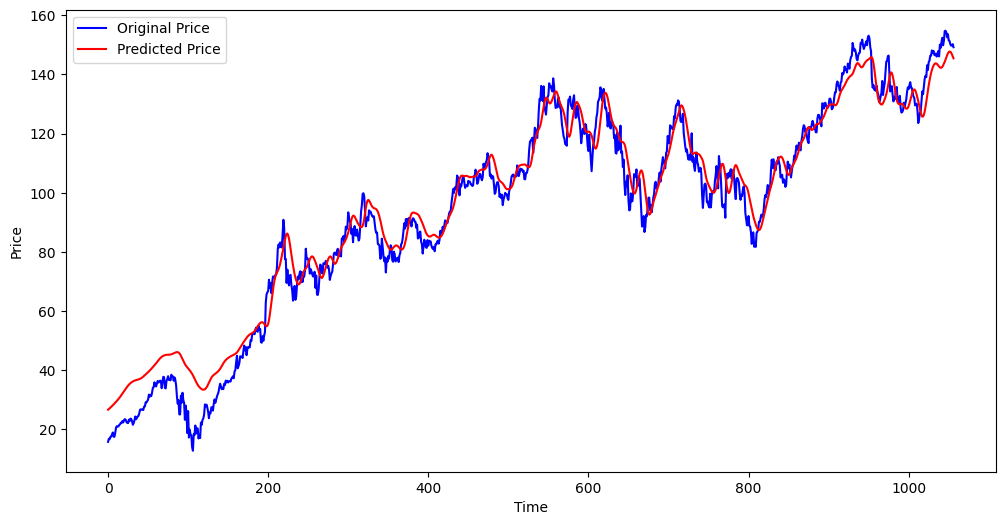

In [30]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()